# FockStateCircuit Tutorial
This is an introduction to the class 'FockStateCircuit'. The class is intended to model optical quantum circuits where the different channels carry well defined number of photons (typically low numbers like 0,1,2,3, ...). These states where the number of photons is well defined are called 'Fock states'. The class supports optical channels where interaction is established through optical components, like beamsplitters or waveplates. There are also classical channels. These can be used to store the result of a measurement or to set the behavior of optical componens.

FockStateCircuits run instances from the class 'CollectionOfStates'. These are collections of states belonging to the FockStateCircuit. The states describe photon numbers in the optical channels and the values of the classical channels. When we run a collection of states on a circuit the collection will evolve through the circuit from an 'input' collection of states to an 'output' collection of states.

The states in the collections are instances of the class 'State'. The states describe photon numbers in the optical channels and the values of the classical channels. The states also carry the history of the different measurement results during evolution through the circuit, as well as a reference to the initial state they originate from. 

## Load the required module(s)

In [1]:
import sys  
sys.path.append("../src")
import fock_state_circuit as fsc
import collection_of_states as cos
import importlib
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
importlib.reload(fsc)
importlib.reload(cos)

<module 'collection_of_states' from 'c:\\Users\\nly99857\\OneDrive - Philips\\SW Projects\\GitHubClones-NewPC\\FockStateCircuit009\\docs_for_github\\../src\\collection_of_states.py'>

## The first circuit
Let's start by building a very simple circuit, consisting of two optical channels which can carry either 0 or 1 photons. In the circuit we have one half-wave plate oriented at 45 degree coupling the two channels. Typically channel 0 would represent horizontally polarized light and channel 1 vertically polarized light. We use the function `evaluate_circuit()` to run the circuit. Default this runs all possible states through the circuit and returns a collection of states describing the results.

If we print the collection of states which is returned from `evaluate_circuit()` we see 4 states in the output. Each state corresponds to a unique input state (called 'initial_state'). The initial states are '00' (no photon in any channel), '10' (photon in channel 0 and no photon in channel 1), '01' (no photon in channel 0 and one photon in channel 1) or '11' (a photon in both channels). Note that default the photon count in channel 0 is the left most digit in the state description. This can be changed when creating the circuit by setting `channel_0_left_in_state_name` to False.

For this circuit we see that if the input state was '01' the output is '10' and if we started with '10' we end up with '01'. States '00' and '11' remain unchanged. This is exactly what we expect from a half wave plate at 45 degrees.

We can also draw the layout of the circuit by calling `circuit.draw()`. For this circuit the layout is not that exciting, but for complex circuits it can help to have a visual representation.

In [2]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                circuit_name='my first circuit'
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)

result = circuit.evaluate_circuit()

print(result)


Printing collection of states
Number of states in collection: 4
Identifier: 'identifier_0'
Initial state: '00'
Cumulative probability: 1.00
Optical components: 
	Component: '00' Amplitude: (1.00 - -0.00i), Probability: 1.00
Identifier: 'identifier_1'
Initial state: '10'
Cumulative probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_3'
Initial state: '11'
Cumulative probability: 1.00
Optical components: 
	Component: '11' Amplitude: (1.00 - -0.00i), Probability: 1.00



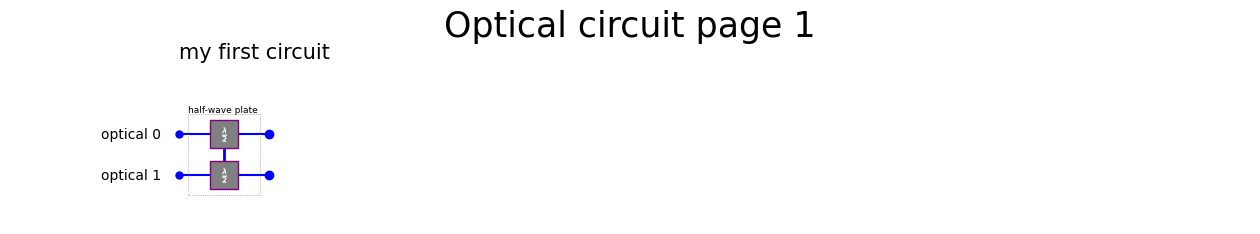

In [3]:
circuit.draw()

In the above example we used all possible input states in the circuit. For bigger systems we would like to be efficient and only run states which are of interest. In that case we can first create a collection of states containing all states. If we use the `circuit` as argument in the contstructor for a new collection of states the collection will be initialized with all possible states for the circuit. We can then use a `filter` function to reduce the collection to the states of interest. In this case we are only interested in states with exactly one photon, either in the first or in the second channel, so we filter in initial state '01' and '10'.

Running this collection through the circuit will only give two states at the output.

In [4]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                circuit_name='my first circuit'
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01','10'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)



Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_1'
Initial state: '10'
Cumulative probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00



## Adding measurement nodes
The next step is to add measurement to the circuit. For this we need classical channels to write the measurement results to. In this case we will measure photon count in channel 0 and channel 1, so we need two classical channels. With these channels we can add a measurement node `measure_optical_to_classical` behind the half wave plate.

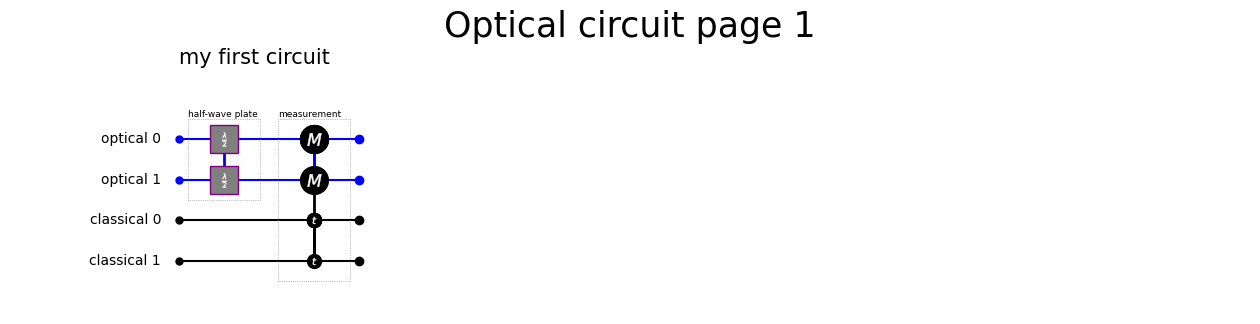

In [5]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2,
                                circuit_name = "my first circuit"
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1], classical_channels_to_be_written=[0,1])
circuit.draw()


If we now run the circuit for initial states '10' and '01' we see that at the output the classical channels have been written. For output state with optical channels as '01' classical channel 0 is 0, and classical channel 1 is 1. In the implementation the measurement does not destroy the photons, they are still in their channels. If we would have had a superposition however the photon state would have collapsed to a state corresponding to the measurement result.

In [6]:

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01', '10'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_1-M1a'
Initial state: '10'
Cumulative probability: 1.00
Classical values: ['0.00', '1.00']
Last measurement result:  
	Measurement results: ['0.00', '1.00'], Probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2-M1a'
Initial state: '01'
Cumulative probability: 1.00
Classical values: ['1.00', '0.00']
Last measurement result:  
	Measurement results: ['1.00', '0.00'], Probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00



To visualize the result we can use the built-in `plot` function. This will plot a bar chart for the values in the classical channels (i.e., the measurement results) for the different `initial_states` used at the input. What we see in the bar chart is that we had as `initial_state` the state '10' (so one horizontally polarized photon) the output state is always '01' (so we always detect a photon in the vertical polarization). If the `initial_state` is however '01' (so we start with a vertically polarized photon) we only see outcomes '10', so we always detect a photon in vertical polarization. Clearly the half-wave plate is flipping the polarization between horizontal and vertical.

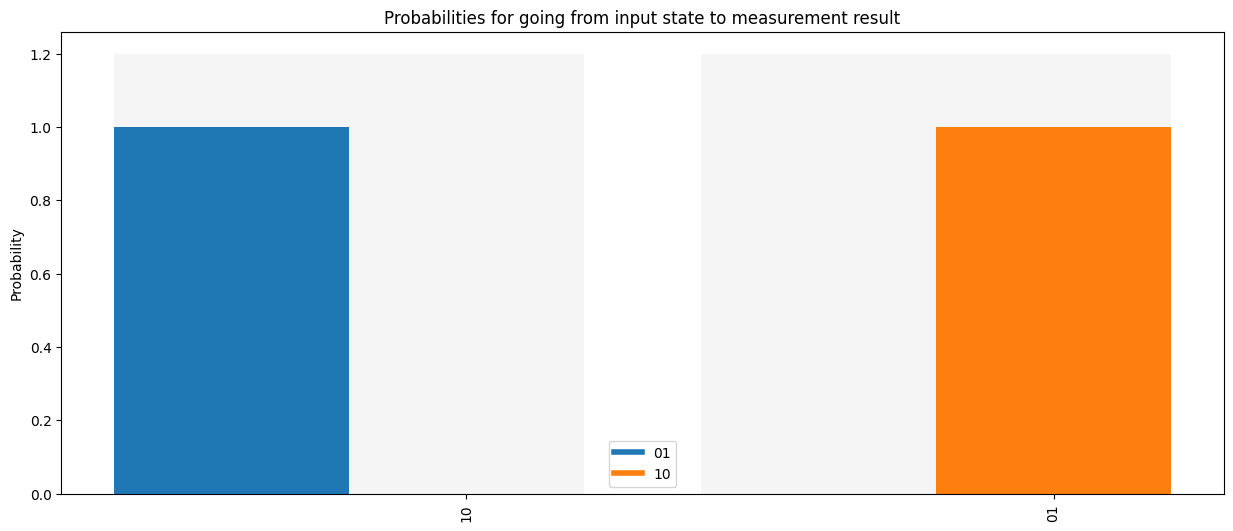

In [7]:
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

result.filter_on_initial_state(initial_state_to_filter=['01','10'])

result.plot()

## Superpositions
In the above example we always has optical states with a single component. We can however also have a superposition. Let's place the half wave plate at 22.5 degrees to achieve this. First we look at a circuit without measurement. We limit the initial state to '10', so one photon in channel 0 and no photon in channel 1. After running `evaluate_circuit` we see that the output collection of states consists of a single state (printing the collection results in 'Number of states in collection: 1'). This single state has as `optical_components` the values 
```
Optical components: 
	Component: '10' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '01' Amplitude: (-0.71 + 0.00i), Probability: 0.50
```
We see that the single state has optical components in superposition between '10' and '01'. Both components have an equal weight, so equal probability to be detected. Note however that the amplitudes have opposite sign. 

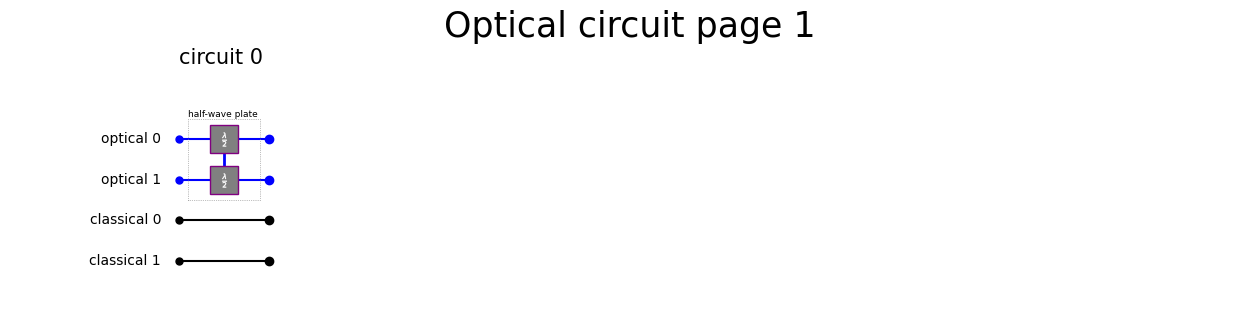

In [8]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2
                                )
circuit.half_wave_plate_225(channel_horizontal=0, channel_vertical=1)
circuit.draw()


In [9]:
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

Printing collection of states
Number of states in collection: 1
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '10' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '01' Amplitude: (-0.71 + 0.00i), Probability: 0.50



Now let's add measurements to the circuit. We still have a half-wave plate at 22.5 degrees which creates a superposition between horizontally and vertcially polarized light. We measure channel 0 and channel 1, so we measure the photon count in the original horizontal and vertical orientation.
When we do this and we print out the resulting collection of states we see that we now have two states in this collection (`Number of states in collection: 2`). These two states each have the same origin (`Initial state: '01'` for both states). One of the states has a classical values `Classical values: ['1.00', '0.00']` and as single optical component `10`, while the other has as classical values `Classical values: ['0.00', '1.00']` and as single optical componet `01`. The likelihood to end up from the initial state in any of the states in the output collection is given by `Cumulative probability: 0.50`. So in this case any of the output states is equally likely.

So our measurement turns a single 'pure' state into a 'statistical mixture', where the 'weight' of each state in the mixture corresponds to the likelihood to find a certain outcome.

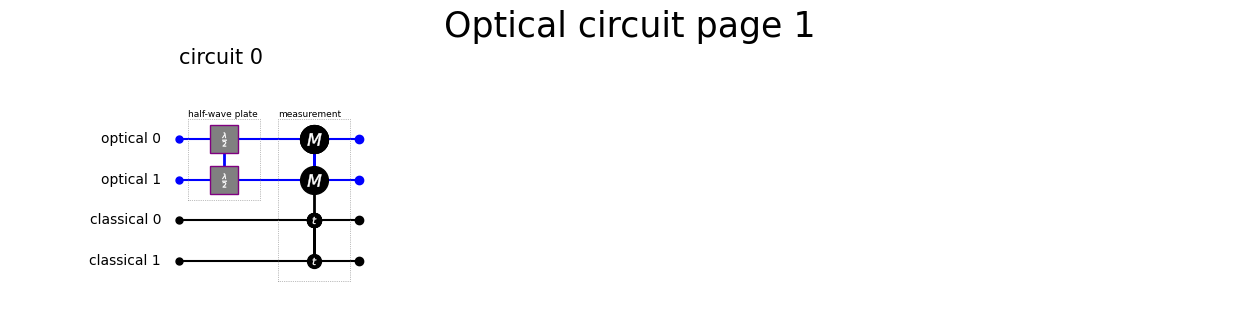

Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_2-M1a'
Initial state: '01'
Cumulative probability: 0.50
Classical values: ['1.00', '0.00']
Last measurement result:  
	Measurement results: ['1.00', '0.00'], Probability: 0.50
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2-M1b'
Initial state: '01'
Cumulative probability: 0.50
Classical values: ['0.00', '1.00']
Last measurement result:  
	Measurement results: ['0.00', '1.00'], Probability: 0.50
Optical components: 
	Component: '01' Amplitude: (-1.00 + 0.00i), Probability: 1.00

Evaluate the output states one at a time
The initial state was: '01'
	The resulting state has as values in the classical channels:  [1, 0]
	The likelihood to get this result is:  0.50
The initial state was: '01'
	The resulting state has as values in the classical channels:  [0, 1]
	The likelihood to get this result is:  0.50


In [10]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2
                                )
circuit.half_wave_plate_225(channel_horizontal=0, channel_vertical=1)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1], classical_channels_to_be_written=[0,1])
circuit.draw()

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

print('Evaluate the output states one at a time')
for resulting_state_name, resulting_state in result.items():
    print('The initial state was:', '{!r}'.format(resulting_state.initial_state))
    print('\tThe resulting state has as values in the classical channels: ', resulting_state.classical_channel_values)
    print('\tThe likelihood to get this result is: ', '{:.02f}'.format(resulting_state.cumulative_probability))


## Beamsplitters

So far we played with half wave plates. Let's have a look at beamsplitters. We can start with the most 'simple' component, a non-polarizing beamsplitter which distributes the light equally over the output ports. We now define a circuit with 4 optical channels (horizontal and vertical polarization for each of the two ports of the beamsplitter). After the beamsplitter we measure the two horizontally polarized ports (channels 0 and 2). In the input collection we look at states with a single horizontally polarized photon in input port a or input port b (with the other port empty), or two horizontally polarized photons simultaneously in both port a and port b. So the three input states are `'1000', '0010'` and `'1010'`. If we run this through the system we can print the output collection (just as we did above), but we can also make a plot of the results by calling `result.plot()`. This gives a bar graph with the outcomes for the different input states. The outcomes are the values of the classical channels after the measurement. We did measure optical channel 0 to classical channel 0 and optical channel 2 to classical channel 1. So in the outcomes `'10'` means a photon in channel 0 and outcome `'01'` means a photon in channel 2. 

Alternatively we could have chosen to create the circuit with 4 classical channels by setting `no_of_classical_channels=4`. In that case we could have measured all optical channels to a classical channel with the same index. The outcomes would then have been of the type `'1000'` and `'0010'`. 

We did choose to create only two classical channels and evaluate outcomes `'10'` and `'01'`. We see in the plot that for the input states with a single horizontal photon the two outputs are equally likely. As we expect from a 50%/50% beamsplitter any input photon in a single port will be equally likely to be found behind any of the output ports. But if we find the photon behind a certain port we know for sure it is not behind the other one (so outcome `'11'`) is not found.

No look at the input state with two photons, each in a different input port (so initial state `'1010'`). We see that there are two outcomes, each with 50% likelihood. Either both photons are behind port 'a'  (outcome `'20'`), or both are behind port 'b' (outcome `'02'`). We never see the case where there is one photon behind each output port (so the outcome `'11'` is not found). This is the famous quantion HOM effect.

IMPORTANT NOTE: We did define for this circuit `length_of_fock_state = 3`. This means we allow in the optical channels a photon occupation of 0,1 or 2 photons. This is crucial to get to the result we have seen. If we would have selected `length_of_fock_state = 2` the system would only allow photon occupations of 0 or 1 photon per channel and the outcomes `'20'`and `'02'` would not be possible. The system would return 100% likelihood to get to outcome `'11'`  which is physically incorrect. So setting the `length_of_fock_state` at the correct value is crucial to get to a valid result. At the same time, the number of possible states grows very fast if you increase `length_of_fock_state` so you also have to take care to net set it to an unnecessarily high value to keep executing speed reasonable.

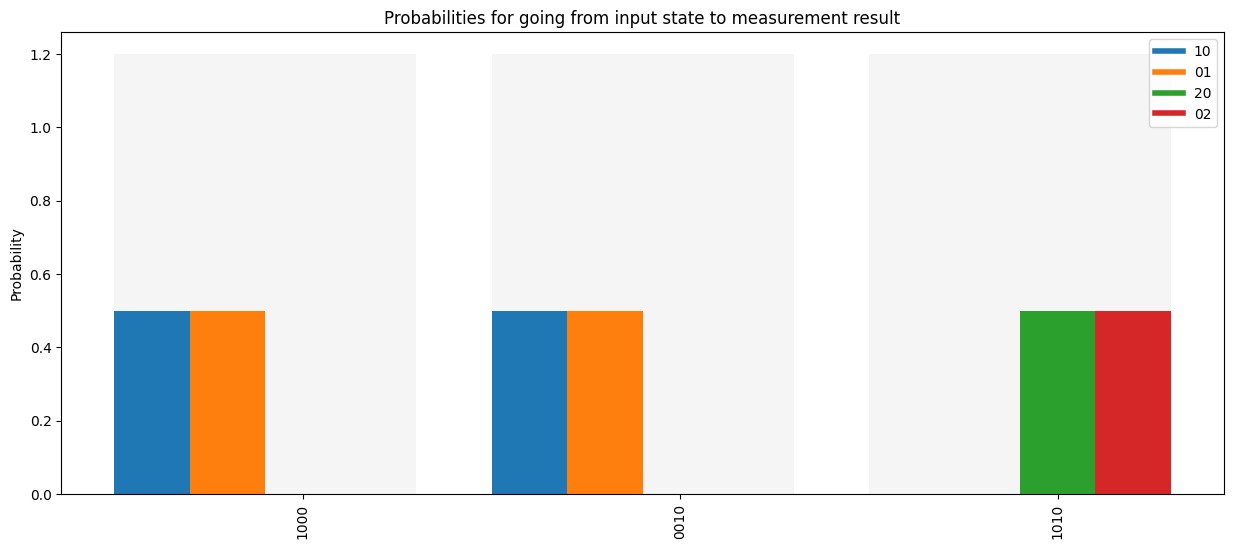

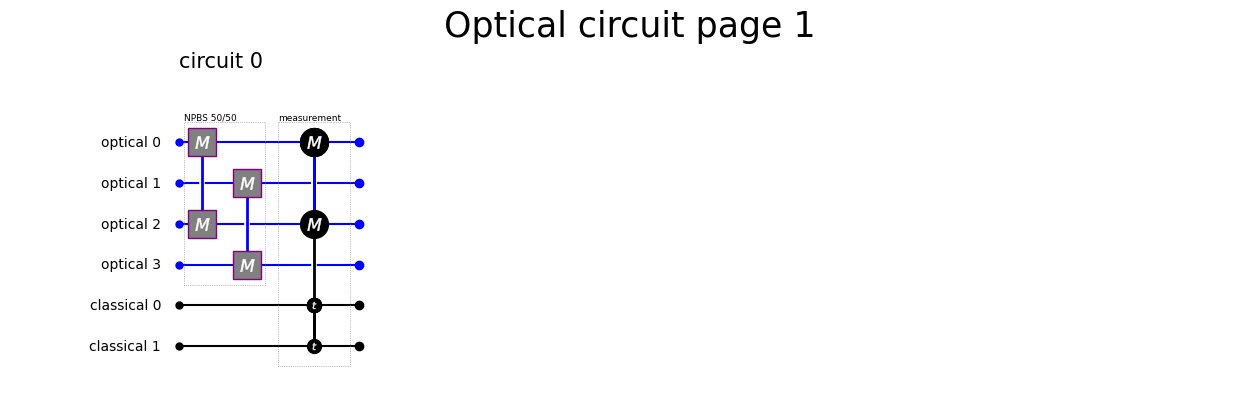

In [11]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=2
                                )
circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,2], classical_channels_to_be_written=[0,1])

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['1000', '0010', '1010'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

result.plot()

circuit.draw()

We know every optical system should be reversible. This means that if we take the output states of the beamsplitter and run them back through the beamsplitter we should end up with the initial states we started with. In this case, let's create two states with optical components `'2000'` and `'0020'` and combine them with amplitudes with equal and with opposite signs. 

So for one input state (the state we will call `entangled_state_plus`) we use as optical components
```
{'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
'0020' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}
```
And for the other input state (the state we will call `entangled_state_minus`) we use as optical components
```
{'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
'0020' : {'amplitude': -math.sqrt(1/2), 'probability': 0.5}}
```
These two states are pure quantum states where there is entanglement between photons in channel 0 and channel 2.

We can add to this a 'mixed' state which describes a statistical mixture. We create this state by calling:
```
mixed_state.set_collection_as_statistical_mixture([(state_2000.copy(), 0.5), (state_0020.copy(), 0.5)])
```
Running these states through the circuit leads to the result we see after calling `result.plot()`

For the mixed state we see in 50% of the cases the outcome with one photon in each port, in 25% of the cases both photons in port a and 25% of the cases both photons in port b. This is what is expected when we see the photons as small ping-pong balls running through this beamsplitter (i.e., if we exclude quantum or optical interference). So for a statistical mixture this is the expected result.

For the entangled states we see that for the state where both components have an amplitude with opposite signe the outcome is always `'1010'`, while for the other case the outcome is always either `'2000'` or `'0020'`. This is exacly what we expect. In fact, when we use `'1010'` as input we find `entangled_state_minus` at the output. So we should expect to find '1010' back when we use `entangled_state_minus` as input. 

IMPORTANT NOTE: We used in above example a statistical mixture. The way this is modelles in a collection of states is that we take states with same value for 'initial_state' and we give them a 'cumulative_probability' representing their weigth in the mixture. In this case we could execute `print(mixed_state)` and get the following result

```
Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_n'
Initial state: 'mixture-huh8e'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '2000' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_3'
Initial state: 'mixture-huh8e'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '0020' Amplitude: (1.00 - 0.00i), Probability: 1.00
```
We see that this mixed state consists of two 'pure states', each with the same 'initial_state' and a 'cumulative_probability' of 0.5. The initial state label is randomly generated, so for nice plotting we did set the label to 'mixture' in the example discussed above.

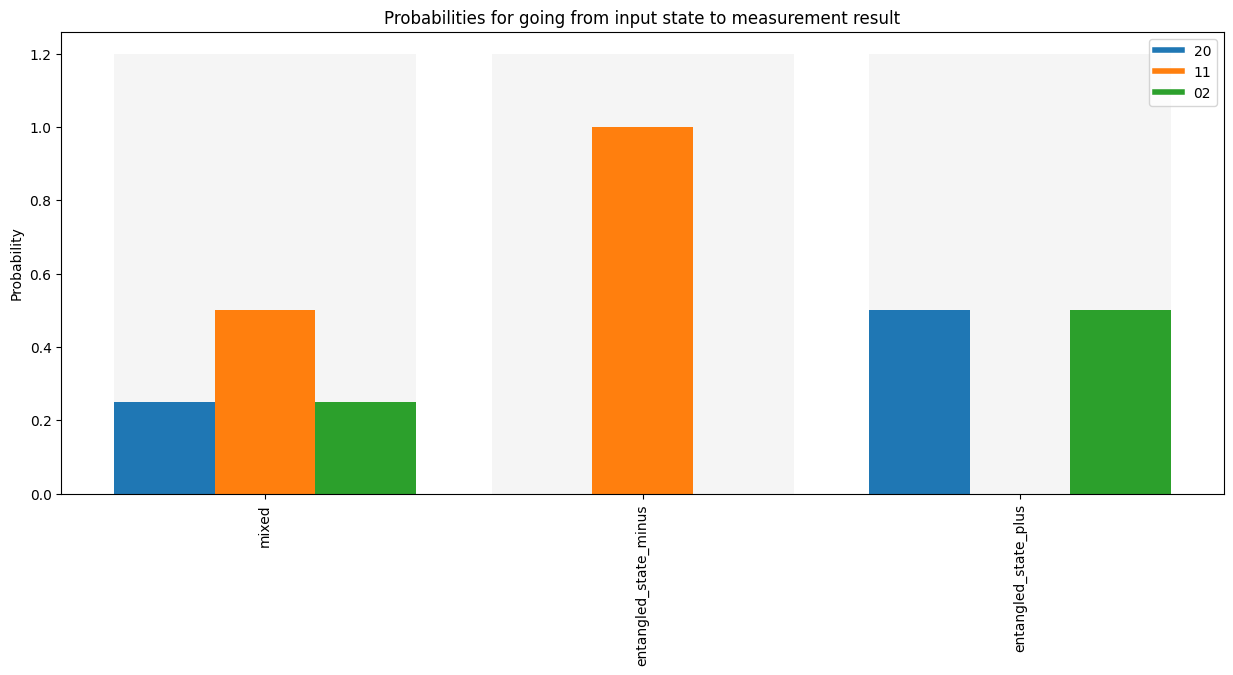

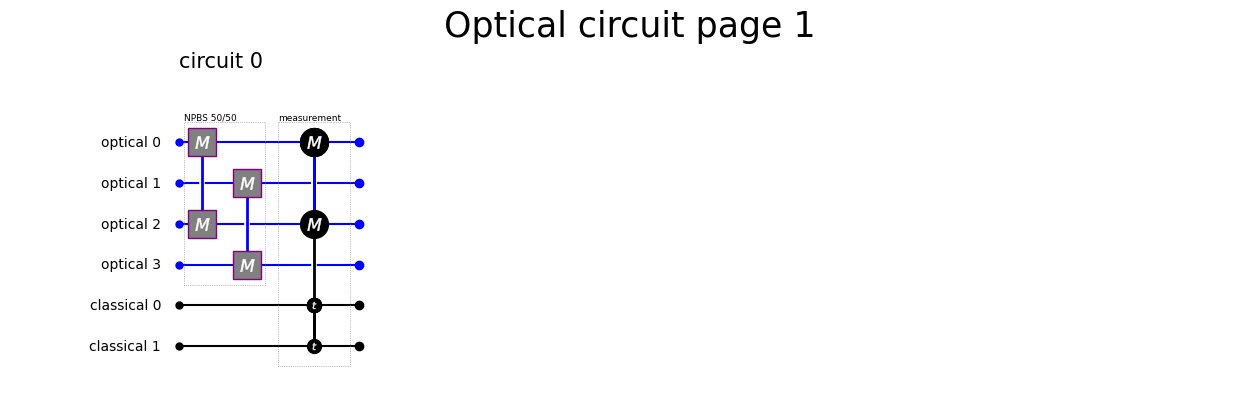

In [12]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=2
                                )
circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,2], classical_channels_to_be_written=[0,1])

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)

state_2000 = initial_collection_of_states.get_state(initial_state='2000')
state_0020 = initial_collection_of_states.get_state(initial_state='0020')
initial_collection_of_states.clear()

mixed_state = initial_collection_of_states.copy()
mixed_state.set_collection_as_statistical_mixture([(state_2000.copy(), 0.5), (state_0020.copy(), 0.5)])

for state in mixed_state:
    state.initial_state = 'mixed'
    initial_collection_of_states.add_state(state=state)

entangled_state_minus = state_2000.create_initialized_state()
entangled_state_minus.initial_state = 'entangled_state_minus'
entangled_state_minus.optical_components = {'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0020' : {'amplitude': -math.sqrt(1/2), 'probability': 0.5}}
initial_collection_of_states.add_state(state=entangled_state_minus)

entangled_state_plus = state_2000.create_initialized_state()
entangled_state_plus.initial_state = 'entangled_state_plus'
entangled_state_plus.optical_components = {'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0020' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}
initial_collection_of_states.add_state(state=entangled_state_plus)

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

result.plot()

circuit.draw()


# Alain Aspect's experiment demonstrating violatio of Bell's inequality
Now we can model one of the famous quantum optical experiments. Let's look at the experiment from Alain Aspect (A. Aspect, J. Dalibard, and G. Roger: Experimental test of Bell’s inequalities using timevarying analyzers. Phys. Rev. Lett. 49, 1804 (1982)).

The setup we want to model is given in Figure 2 of the article

![title](../images/AlainAspectFig2.png)

We have a source of entangled photons which travel in two different directions. Then we have detectors behind polarizers oriented at different angles. We are interested in determining the correlation between detecting a photon in at one side and detecting a photon at the other side for different angles of the polarizers. For each side we have two settings for the polarizer: a and a' at one side and b and b' at the other side. In the Aspect paper Figure 2 shows a fast switch at each side (CI and CII) to determine the polarization.

We will model this by using a FockStateCircuit with  4 channels. Channel 0 and 1 represent the system to the left of the photon generation and channel 2 and channel 3 represent the system to the right. We then use detecors in channel 0 and channel 2 representing the detection in a polarization direction. A half-wave plate in front of the detector determines the exact polarization angle which is detected. 

The polarization angles for which we expect maximum violation of the Bell inequality is 
* $a = 0^o, \theta = 0$
* $b = 22.5^o, \theta = \pi/8$
* $a'= 45^o,\theta = \pi/4$
* $b'= 67.5^o,\theta = 3\pi/8$

We run the circuit for these for settings by iterating through the dictionary `polarization_settings`
```
polarization_settings = {'ab' : {'left': 0  , 'right' : math.pi/16},
                        'a\'b': {'left': 0 , 'right' : 3*math.pi/16}, 
                        'ab\'' : {'left': math.pi/8 , 'right' : math.pi/16}, 
                        'a\'b\'' : {'left': math.pi/8 , 'right' : 3*math.pi/16 }}
```

As input we use an entangled state such that either both photons are horizontally, or both photons are vertically polarized
```
entangled_state.optical_components = {'1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}
```

For each of the polarization setting we measure the correlation as $P = N_{11} + N_{00} - N_{10} - N_{01}$. The higher the likelihood for the same outcome left and right, the higher this correlation. The parameter $S$ is then defined as $S = P(a,b) - P(a,b') + P(a',b) + P(a',b')$. Classical theory limits this $S$ to values between -2 and 2. The prediction from quantum theory is that $S$ is $2\sqrt{2}$ for the specific angles mentioned above (this tutorial is not the place to go into details on this analysis. Check for instance "Experimental consequences of objective local theories", Clauser and Horne, Phys.Rev.D. 10 (2):536 - 535 )". 

If we run our system with the `entangled_state`  as input and the half-wave plate orientation angles defined in `polarization_settings` we find exactly the value we expect from quantum mechanics:
```
S for entangled state and polarization settings for maximum Bell inequality violation:  2.8284267323312253
```


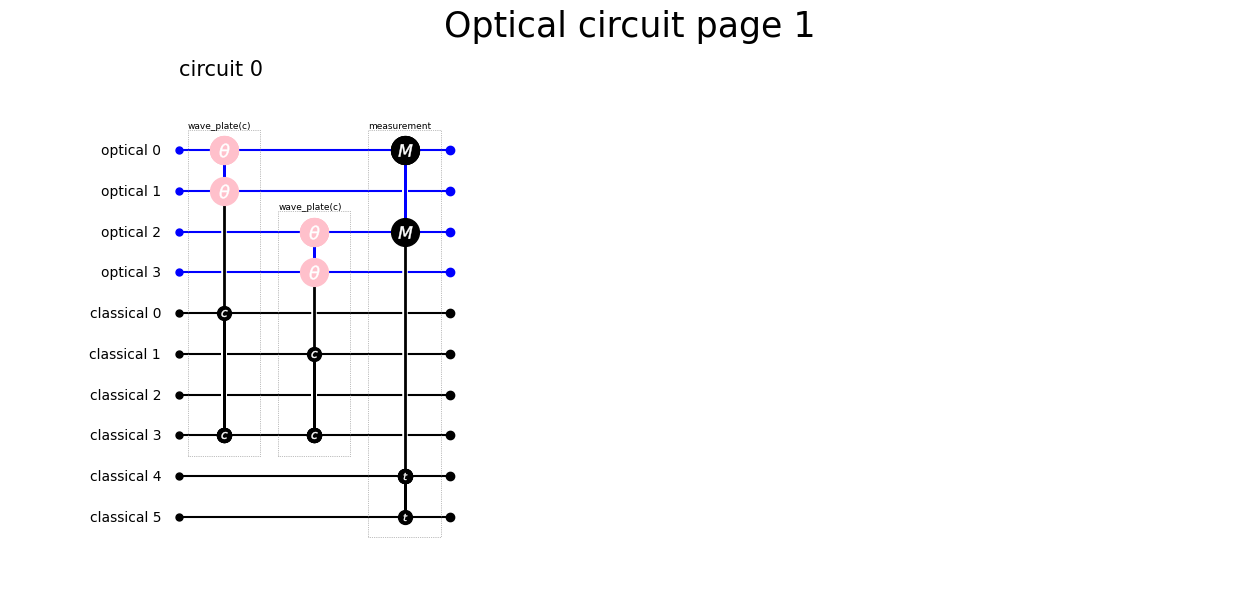

In [13]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=6)

# orient polatizers before detectors
circuit.wave_plate_classical_control(optical_channel_horizontal=0,
                                     optical_channel_vertical=1,
                                     classical_channel_for_orientation=0,
                                     classical_channel_for_phase_shift=3)
circuit.wave_plate_classical_control(optical_channel_horizontal=2,
                                     optical_channel_vertical=3,
                                     classical_channel_for_orientation=1,
                                     classical_channel_for_phase_shift=3)

circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,2],classical_channels_to_be_written=[4,5])
circuit.draw()

# define the angles we need for the half-wave plates in order to rotate polarization over the correct angle
polarization_settings = {'ab' : {'left': 0  , 'right' : math.pi/16},
                        'a\'b': {'left': 0 , 'right' : 3*math.pi/16}, 
                        'ab\'' : {'left': math.pi/8 , 'right' : math.pi/16}, 
                        'a\'b\'' : {'left': math.pi/8 , 'right' : 3*math.pi/16 }}


In [14]:

# First create an entangles state where both photons are either both 'H' polarized or both 'V' polarized
# The optical state is 1/sqrt(2)  ( |HH> + |VV> )
initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
entangled_state = initial_collection_of_states.get_state(initial_state='0000').copy()
initial_collection_of_states.clear()
entangled_state.initial_state = 'entangled_state'
entangled_state.optical_components = {'1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}


S_ent = []
E = []

for key, setting in polarization_settings.items():
    initial_collection_of_states.clear()
    state = entangled_state.copy()
    state.classical_channel_values = [setting['left'],setting['right'], 0, math.pi,0,0]
    state.initial_state = 'entangled_state_' + key
    state.cumulative_probability = 1
    initial_collection_of_states.add_state(state)
    result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
    result11 = result.copy()
    result11.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[1,1])
    probability11 = sum([state.cumulative_probability for state in result11])
    result00 = result.copy()
    result00.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[0,0])
    probability00 = sum([state.cumulative_probability for state in result00])
    E.append(2*(probability00+probability11)-1)
    
S_ent = E[0] - E[1] + E[2] + E[3]

print("S for entangled state and polarization settings for maximum Bell inequality violation: ", S_ent)

S for entangled state and polarization settings for maximum Bell inequality violation:  2.8284267323312253


We can expand on this and plot the value of $S$ as a function of the angular alignment of the half wave plates. So we can take for the settings:
```
    settings = [(0, p, 'ab'),
                (0, p + math.pi/8, 'a\'b'), 
                (math.pi/8,p, 'ab\''), 
                (math.pi/8,p + math.pi/8, 'a\'b\'')]
```
where $p$ is an angle we vary. For $p = 0$ the settings left and right are equal, for $p = \frac{\pi}{16}$ we have the setting for maximum violation of Bell's inequality. By creating a collection of states with different values for $p$ we can evaluate the full curve by calling `evaluate_circuit` once. We can also add a mixed state and show that in that case the value of $S$ stays within the boundaries of Bell's inequality.

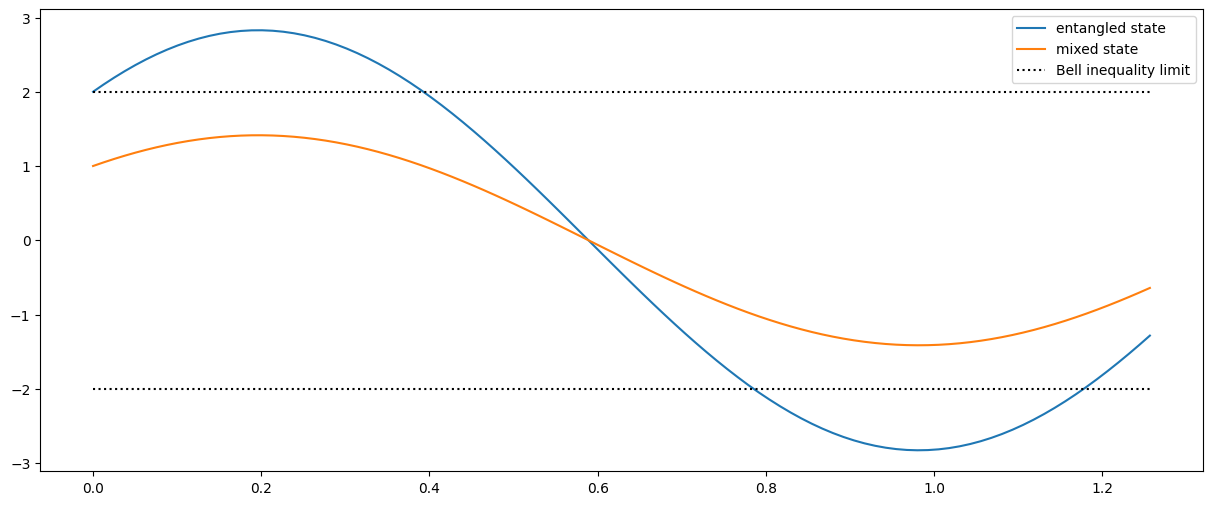

In [15]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=6)

# overall rotation to randomize the angle
circuit.wave_plate_classical_control(optical_channel_horizontal=0,
                                     optical_channel_vertical=1,
                                     classical_channel_for_orientation=2,
                                     classical_channel_for_phase_shift=3)
circuit.wave_plate_classical_control(optical_channel_horizontal=2,
                                     optical_channel_vertical=3,
                                     classical_channel_for_orientation=2,
                                     classical_channel_for_phase_shift=3)

# orient polatizers before detectors
circuit.wave_plate_classical_control(optical_channel_horizontal=0,
                                     optical_channel_vertical=1,
                                     classical_channel_for_orientation=0,
                                     classical_channel_for_phase_shift=3)
circuit.wave_plate_classical_control(optical_channel_horizontal=2,
                                     optical_channel_vertical=3,
                                     classical_channel_for_orientation=1,
                                     classical_channel_for_phase_shift=3)

circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,2],classical_channels_to_be_written=[4,5])

initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
entangled_state = initial_collection_of_states.get_state(initial_state='0000').copy()
initial_collection_of_states.clear()
entangled_state.initial_state = 'entangled_state'
entangled_state.optical_components = {'1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}
S_ent = []
angle = []
for j in range(101):
    p = j*math.pi/250
    angle.append(p)
    settings = [(0, p, 'ab'),
                (0, p + math.pi/8, 'a\'b'), 
                (math.pi/8,p, 'ab\''), 
                (math.pi/8,p + math.pi/8, 'a\'b\'')]
    E = []
    for s in settings:
        initial_collection_of_states.clear()
        orientation_angle = 0*math.pi*j/25
        state = entangled_state.copy()
        state.classical_channel_values = [s[0],s[1], 0, math.pi,0,0]
        state.initial_state = 'entangled_state_' + str(s[2])
        state.cumulative_probability = 1
        initial_collection_of_states.add_state(state)
        result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
        result11 = result.copy()
        result11.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[1,1])
        probability11 = sum([state.cumulative_probability for state in result11])
        result00 = result.copy()
        result00.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[0,0])
        probability00 = sum([state.cumulative_probability for state in result00])
        E.append(2*(probability00+probability11)-1)
    S_ent.append(E[0] - E[1] + E[2] + E[3])



initial_collection_of_states = cos.CollectionOfStates(fock_state_circuit=circuit)
mixed_state1 = initial_collection_of_states.get_state(initial_state='0000').copy()
mixed_state2 = initial_collection_of_states.get_state(initial_state='0000').copy()
initial_collection_of_states.clear()

mixed_state1.initial_state = 'mixture'
mixed_state1.optical_components = {'1010' : {'amplitude': 1, 'probability': 1}}
mixed_state1.cumulative_probability =0.5

mixed_state2.initial_state = 'mixture'
mixed_state2.optical_components = {'0101' : {'amplitude': 1, 'probability': 1}}
mixed_state2.cumulative_probability =0.5

S_mix = []
for j in range(101):
    p = j*math.pi/250
    # These are setting which give the maximum value of S for classical states.
    # settings = [(0, p, 'AB'),
    #             (0, p + math.pi/4, 'Ab'), 
    #             (math.pi/4,p, 'aB'), 
    #             (math.pi/4,p + math.pi/4, 'ab')]
    settings = [(0, p, 'ab'),
                (0, p + math.pi/8, 'a\'b'), 
                (math.pi/8,p, 'ab\''), 
                (math.pi/8,p + math.pi/8, 'a\'b\'')]
    E = []
    for s in settings:
        initial_collection_of_states.clear()
        orientation_angle = 0*math.pi*j/25
 
        state1 = mixed_state1.copy()
        state1.classical_channel_values = [s[0],s[1]+orientation_angle, 0, math.pi,0,0]
        state1.initial_state = 'entangled_state_' + str(s[2]) +str(j)
        state1.cumulative_probability = float(0.5)
        initial_collection_of_states.add_state(state1)

        state2 = mixed_state2.copy()
        state2.classical_channel_values = [s[0],s[1]+orientation_angle, 0, math.pi,0,0]
        state2.initial_state = 'entangled_state_' + str(s[2]) +str(j)
        state2.cumulative_probability = float(0.5)
        initial_collection_of_states.add_state(state2)

        result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
        result11 = result.copy()
        result11.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[1,1])
        probability11 = sum([state.cumulative_probability for state in result11])
        result00 = result.copy()
        result00.filter_on_classical_channel(classical_channel_numbers=[4,5], values_to_filter=[0,0])
        probability00 = sum([state.cumulative_probability for state in result00])
        E.append(2*(probability00+probability11)-1)
    S_mix.append(E[0] - E[1] + E[2] + E[3])

plt.plot(angle,S_ent, label = 'entangled state')
plt.plot(angle,S_mix, label = 'mixed state')
plt.plot([0,max(angle)],[2,2], color = 'black', linestyle = ':', label = 'Bell inequality limit')
plt.plot([0,max(angle)],[-2,-2], color = 'black', linestyle = ':', label = None)
plt.legend()

In [16]:
fsc.about()


FockStateCircuit: Quantum Optics with Fock States for Python
Copyright (c) 2023 and later.
Rob Hendriks

FockStateCircuit:   0.0.9
CollectionOfStates: 0.0.9
Numpy Version:      1.26.1
Matplotlib version: 3.8.0
